In [1]:
#import the libaries taht we will need 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import integrate



(500, 2)


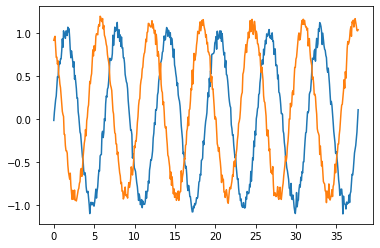

torch.Size([499, 2])
torch.Size([499, 2])


In [8]:
#make the data 
t = np.linspace(0, 12*np.pi, 500)
x = np.array([np.sin(t), np.cos(t+0.5) + 0.1]).T  
x = x + np.random.normal(0,0.05, x.shape) #add noise
print(x.shape)

plt.plot(t ,x[:,0]) #plot so we can see what it looks like
plt.plot(t, x[:,1])

plt.show()

#make data into inputs and outputs and put into torch tensors (which are a lot like np arrasys, but the way pytorch likes them)
# inputs = x[:499]
# outputs = x[1:]
# inputs = torch.from_numpy(inputs).float()
# outputs = torch.from_numpy(outputs).float()
# print(inputs.shape)
# print(outputs.shape)
# np.save("inputs_with_noise.npy", inputs)
# np.save("outputs_with_noise.npy", outputs)

#load the data
inputs =  torch.from_numpy(np.load("inputs.npy")).float()
outputs =  torch.from_numpy(np.load("outputs.npy")).float()
print(inputs.shape)
print(outputs.shape)
#make a test set if we want
t = np.linspace(0, 12*np.pi, 500)
x_test = np.array([np.sin(t), np.cos(t+0.5) + 0.1]).T 
# x_test = x_test + np.random.normal(0,0.05, x.shape)
inputs_test = torch.from_numpy(x_test[:499]).float()
outputs_test = torch.from_numpy(x_test[1:]).float()

In [9]:
#make our network object
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = torch.nn.Linear(2, 100) #inputs of first layer needs to be number of inputs of data
        self.layer2 = torch.nn.Linear(100, 100)
        self.layer3 = torch.nn.Linear(100, 2) #outputs of last layer needs to be number of outputs of data
        
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x) #2 -> 100 in the middle
        x = self.relu(x) #doing the activation on the hidden layer
        x = self.layer2(x) # 100 -> 100
        x = self.relu(x) #doing the activation on the hidden layer
        x = self.layer3(x) # 100 -> 2
        #no activation on last layer
        
        return x

#make a network object called net
net = Net()
print(net)

Net(
  (layer1): Linear(in_features=2, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=100, bias=True)
  (layer3): Linear(in_features=100, out_features=2, bias=True)
  (relu): ReLU()
)


In [10]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

epoch =  0 : error =  0.58897156
epoch =  100 : error =  0.00052745116
epoch =  200 : error =  6.923514e-05
epoch =  300 : error =  3.83653e-05
epoch =  400 : error =  2.7678181e-05
epoch =  500 : error =  2.2036562e-05
epoch =  600 : error =  1.8084875e-05
epoch =  700 : error =  1.4942862e-05
epoch =  800 : error =  1.2459259e-05
epoch =  900 : error =  1.0552384e-05
epoch =  1000 : error =  9.153972e-06
epoch =  1100 : error =  8.121603e-06
epoch =  1200 : error =  7.3142287e-06
epoch =  1300 : error =  6.65624e-06
epoch =  1400 : error =  6.118045e-06
epoch =  1500 : error =  5.6774584e-06
epoch =  1600 : error =  5.2969112e-06
epoch =  1700 : error =  4.9679975e-06
epoch =  1800 : error =  4.6764694e-06
epoch =  1900 : error =  4.417995e-06
epoch =  2000 : error =  4.185448e-06
epoch =  2100 : error =  3.975581e-06
epoch =  2200 : error =  3.7798648e-06
epoch =  2300 : error =  3.601694e-06
epoch =  2400 : error =  3.4394614e-06


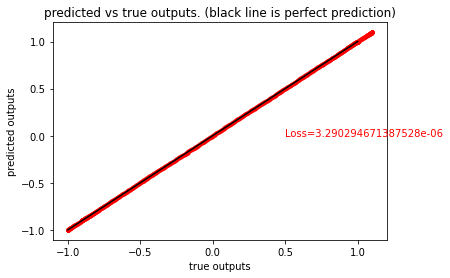

In [11]:
error_list = list()
for i in range(2500): #we can change the number of epochs that we want to train for
    prediction = net(inputs)
    loss = loss_func(prediction, outputs) 
    
    if i % 10 == 0: #how often we want to append the error
        error_list.append(loss.detach().numpy())
        
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       

    if i % 100 == 0: #how often we want to print 
        print("epoch = ", i, ": error = ", loss.detach().numpy())

#make a plot of the predicted and real (black line will be perfect fit)
# plt.scatter(inputs.data.numpy(), outputs.data.numpy())
plt.plot(outputs.data.numpy(), prediction.data.numpy(), 'r.', lw=2)
plt.plot([-1, 1], [-1, 1], 'k')
plt.xlabel("true outputs")
plt.ylabel("predicted outputs")
plt.title("predicted vs true outputs. (black line is perfect prediction)")

plt.text(0.5, 0, 'Loss={}'.format(loss.data.numpy()), fontdict={'size': 10, 'color':  'red'})
plt.pause(0.1)

predicted shape =  (499, 2)
inputs_test shape =  torch.Size([499, 2])
error =  0.00033574189097458764


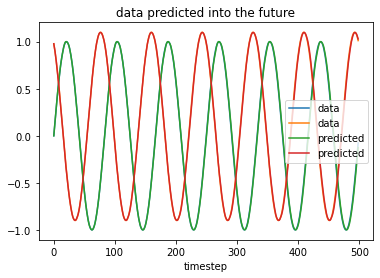

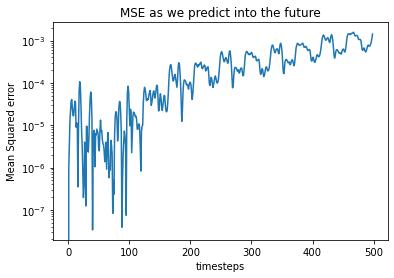

In [12]:
#predict out into the future

timesteps = 499 #number of timesteps in the future we want to predict
predicted = np.zeros((timesteps, 2)) #make prediction array to fill in

#starting point
y_pred = inputs_test[0]
predicted[0] = y_pred

#predict out into the future
for i in range(timesteps-1):
    y_pred = net(y_pred) #calling the net object will run the forward function which will predict 1 step into the future
    predicted[i + 1] = y_pred.detach().numpy()
    
    
#plot
plt.plot(inputs_test[:timesteps], label = "data")
plt.plot(predicted, label = "predicted")
plt.legend()
plt.xlabel("timestep")
plt.title("data predicted into the future")

print("predicted shape = ", predicted.shape)
print("inputs_test shape = ", inputs_test.shape)
print("error = ", np.mean((inputs_test[:timesteps].detach().numpy() - predicted[:,:timesteps])**2))
plt.show()

plt.semilogy(np.mean((inputs_test[:timesteps].detach().numpy() - predicted)**2 ,axis = 1))
plt.xlabel("timesteps")
plt.ylabel("Mean Squared error")
plt.title("MSE as we predict into the future")
plt.show()

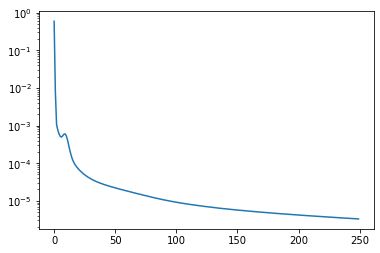

In [13]:
plt.semilogy(error_list)